Submit the synopsis for the data mining project. It should comprise the following:

1. Group Members: Name and roll numbers (2-5 students)

2. Problem Statement

3. Data set, its source, and the description

4. IPNB File showing the summary of dataset. Summary should include:\
a. data distribution (histogram) of attributes\
b. information about type of attributes (numeric/categorical (try to have an equal mix of the attributes))\
c. information about class label distribution through pie chart (prefer balanced classes having almost equal number of instances of each class).\
PS: You may refer chapter-3 for data visualization. We encourage the use of interactive visualizations (Eg: bokeh for histogram)\

5. In the same IPYNB file, perform pre-processing on the data being read(wherever applicable):\
a. Normalization of the attributes of the dataset\
b. Handle Missing values if any (You may opt to remove observations with missing values, or fill suitable values as discussed in theory class)\
c. Remove features/attributes having zero variance.

**IMPORTING MODULES**

---





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,export_text,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pydotplus
from IPython.display import Image
from mlxtend.plotting import plot_confusion_matrix

**IMPORTING DATA**

---



In [2]:
read_batsman = pd.read_csv('https://raw.githubusercontent.com/Hacker-BlackHATS/PROJECT_WORK_2021IPL/main/DATASETS/Batsman_DataSet.csv')

**SUMMARY OF BATSMAN DATASET**

---



In [3]:
read_batsman.describe()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %
count,803.000000,803.000000,803.000000,803.000000,803.000000,789.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,2015.961395,11.835616,274.973848,201.628892,9.500623,27.463878,130.085554,55.597758,1.491905,0.097136,23.178082,12.037360,37.196513
std,3.451806,8.369752,243.785341,168.429134,7.083995,15.924603,29.588252,30.259952,1.922662,0.381007,20.870804,14.926122,10.878516
min,2008.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,6.000000,87.000000,64.500000,4.000000,18.000000,117.750000,33.000000,0.000000,0.000000,6.000000,3.000000,31.550000
50%,2016.000000,11.000000,225.000000,166.000000,9.000000,26.100000,130.800000,56.000000,1.000000,0.000000,18.000000,8.000000,36.000000
75%,2019.000000,15.000000,394.500000,295.500000,13.000000,34.000000,145.900000,76.500000,2.000000,0.000000,34.000000,15.500000,41.000000
max,2021.000000,53.000000,1578.000000,1006.000000,45.000000,152.000000,266.700000,175.000000,14.000000,4.000000,115.000000,120.000000,100.000000


**HISTOGRAM OF BATSMAN DATASET ATTRIBUTES**

---



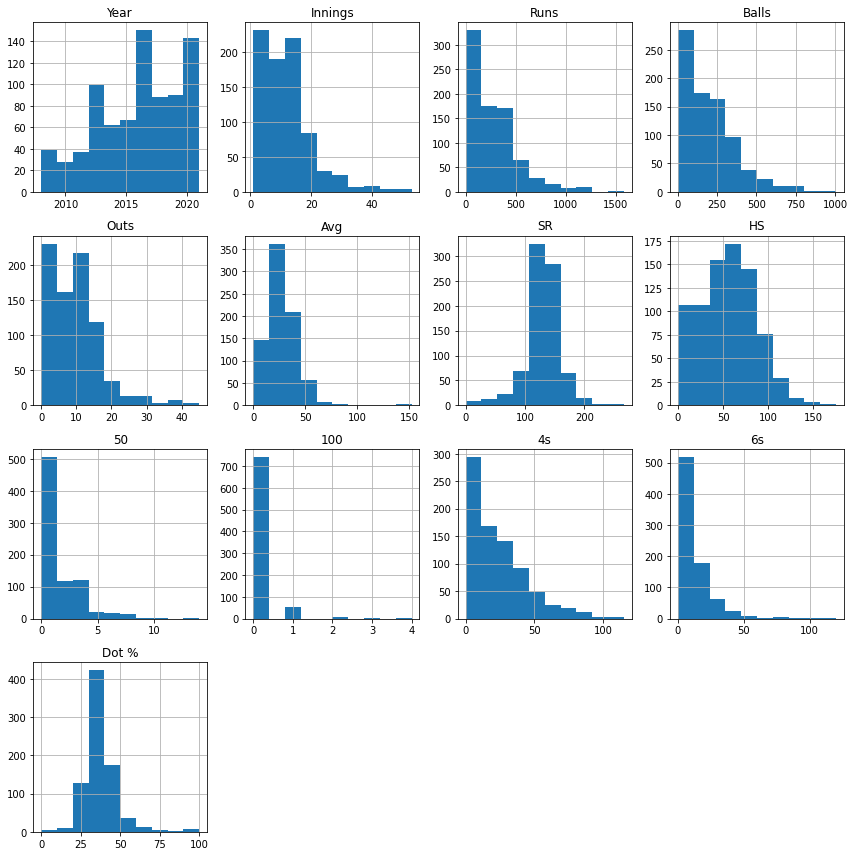

In [5]:
read_batsman.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

**ATTRIBUTE DATA TYPES OF BATSMAN DATASET**

---



In [7]:
read_batsman.dtypes

Name        object
Year         int64
Innings      int64
Runs         int64
Balls        int64
Outs         int64
Avg        float64
SR         float64
HS           int64
50           int64
100          int64
4s           int64
6s           int64
Dot %      float64
Team        object
dtype: object

**APPLYING ROUBUST SCALING**

---



In [9]:
# Robust Scaling

scaler = RobustScaler()
# fit and transform the data
read_batsman.iloc[:, 2:-1] = scaler.fit_transform(read_batsman.iloc[:, 2:-1])

read_batsman # AFTER SCALING

,Name,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Team
0,VIRAT KOLHI,2008,0.111111,-0.195122,-0.038961,0.222222,-0.69375,-0.912966,-0.413793,-0.5,0.0,0.000000,-0.32,0.973545,Royal Challengers Bangalore
1,VIRAT KOLHI,2009,0.666667,0.325203,0.450216,0.555556,-0.18125,-0.369449,-0.137931,0.0,0.0,0.571429,0.00,0.264550,Royal Challengers Bangalore
2,VIRAT KOLHI,2010,0.666667,0.634146,0.510823,0.555556,0.24375,0.607460,0.045977,0.0,0.0,0.642857,0.64,-0.899471,Royal Challengers Bangalore
3,VIRAT KOLHI,2011,1.222222,1.834146,1.961039,0.888889,1.26875,-0.117229,0.643678,2.5,0.0,2.142857,1.44,0.190476,Royal Challengers Bangalore
4,VIRAT KOLHI,2012,0.444444,0.452033,0.692641,0.444444,0.11875,-0.678508,0.390805,0.5,0.0,0.535714,0.16,0.380952,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,SAM CURRAN,2019,0.555556,0.289431,0.181818,0.222222,0.15000,0.717584,-0.022989,1.0,0.0,0.678571,0.32,0.264550,Chennai Super Kings
799,SAM CURRAN,2020,0.000000,-0.126829,-0.108225,-0.111111,-0.18125,0.039076,-0.091954,0.0,0.0,-0.214286,0.32,0.613757,Chennai Super Kings
800,KRISHNAPPA GOWTHAM,2018,0.222222,-0.321951,-0.441558,0.000000,-0.75625,2.348135,-0.528736,-0.5,0.0,-0.321429,0.08,-0.507937,Chennai Super Kings
801,KRISHNAPPA GOWTHAM,2019,-0.777778,-0.673171,-0.636364,-0.666667,-1.25625,-1.282416,-1.080460,-0.5,0.0,-0.607143,-0.56,1.756614,Chennai Super Kings


**HANDLING MISSING VALUES**

---



In [11]:
read_batsman.dropna(inplace=True)

In [12]:
read_batsman.head()

,Name,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Team
0,VIRAT KOLHI,2008,0.111111,-0.195122,-0.038961,0.222222,-0.69375,-0.912966,-0.413793,-0.5,0.0,0.000000,-0.32,0.973545,Royal Challengers Bangalore
1,VIRAT KOLHI,2009,0.666667,0.325203,0.450216,0.555556,-0.18125,-0.369449,-0.137931,0.0,0.0,0.571429,0.00,0.264550,Royal Challengers Bangalore
2,VIRAT KOLHI,2010,0.666667,0.634146,0.510823,0.555556,0.24375,0.607460,0.045977,0.0,0.0,0.642857,0.64,-0.899471,Royal Challengers Bangalore
3,VIRAT KOLHI,2011,1.222222,1.834146,1.961039,0.888889,1.26875,-0.117229,0.643678,2.5,0.0,2.142857,1.44,0.190476,Royal Challengers Bangalore
4,VIRAT KOLHI,2012,0.444444,0.452033,0.692641,0.444444,0.11875,-0.678508,0.390805,0.5,0.0,0.535714,0.16,0.380952,Royal Challengers Bangalore


**REMOVING ATTRIBUTES HAVING ZERO VARIANCE**

---



In [13]:
# CHECKING ZERO VARIANCE ATTRIBUTES IN BATSMAN DATASET
for i in range(2, read_batsman.shape[1]-1):
    print(np.round(read_batsman[read_batsman.columns[i]].var()) == 0)

False
False
False
False
False
False
True
False
True
False
False
False


In [15]:
# REMOVING ZERO VARIANCE ATTRIBUTES IN BATSMAN DATASET
for i in range(2, read_batsman.shape[1]-1):
    if np.round(read_batsman[read_batsman.columns[i]].var()) == 0:
        read_batsman.drop(read_batsman.columns[i], axis=1, inplace=True)

In [17]:
# RE-CHECKING ZERO VARIANCE ATTRIBUTES IN BATSMAN DATASET
for i in range(2, read_batsman.shape[1]-1):
    print(np.round(read_batsman[read_batsman.columns[i]].var()) == 0)

False
False
False
False
False
False
False
False
False
False


**Retriving attributes(X) and target values(Y)**

In [21]:
#Retriving attributes(X) and target values(Y)
dataSet = read_batsman
prePoc = False
name = 'IPL'
X = dataSet.values[:,:-1]
Y = dataSet.values[:,-1]
print(f"The observation of X:{X.shape}")
classlabel = np.unique(Y)
print(f"The observation of Y:{Y.shape}")
print(f"The classlabels are:{classlabel}")
col = dataSet.columns[2:]
col = list(col)
col.pop()
col

The observation of X:(789, 12)
The observation of Y:(789,)
The classlabels are:['Chennai Super Kings' 'Delhi Capitals' 'Kolkata Knight Ride'
 'Mumbai Indians' 'Punjab Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


['Innings', 'Runs', 'Balls', 'Outs', 'Avg', 'SR', '50', '4s', '6s', 'Dot %']

***PREPROCESSING :***

In [22]:
def delDup(dataframe, mode):
    mode = str(mode)
    if mode == 'show':
        dups = dataframe.duplicated(keep='first')
        if dups.any() == True:
            return (dataframe[dups])
        else:
            print("No duplicates found!")
    elif mode == 'del':
        dataframe = dataframe.drop_duplicates()
        return dataframe
  
print("Dataset shape before duplication removing:")
print(dataSet.shape)
print('\n')
print("Duplicate rows:")
d = delDup(dataSet, 'show')
print(d)
print('\n')
print("Dataset shape after duplication removing:")
dataSet = delDup(dataSet,'del')
print(dataSet.shape)
#dataSet


Dataset shape before duplication removing:
(789, 13)


Duplicate rows:
No duplicates found!
None


Dataset shape after duplication removing:
(789, 13)


In [23]:
if prePoc==True:
  XScaled = preprocessing.scale(X[:,2:])
else:
   XScaled=X[:,2:]


batsman_preproc = pd.DataFrame(XScaled,columns=col)
batsman_preproc = delDup(batsman_preproc,'del')
batsman_preproc

,Innings,Runs,Balls,Outs,Avg,SR,50,4s,6s,Dot %
0,0.111111,-0.195122,-0.038961,0.222222,-0.69375,-0.912966,-0.5,0,-0.32,0.973545
1,0.666667,0.325203,0.450216,0.555556,-0.18125,-0.369449,0,0.571429,0,0.26455
2,0.666667,0.634146,0.510823,0.555556,0.24375,0.60746,0,0.642857,0.64,-0.899471
3,1.22222,1.83415,1.96104,0.888889,1.26875,-0.117229,2.5,2.14286,1.44,0.190476
4,0.444444,0.452033,0.692641,0.444444,0.11875,-0.678508,0.5,0.535714,0.16,0.380952
...,...,...,...,...,...,...,...,...,...,...
784,0.555556,0.289431,0.181818,0.222222,0.15,0.717584,1,0.678571,0.32,0.26455
785,0,-0.126829,-0.108225,-0.111111,-0.18125,0.0390764,0,-0.214286,0.32,0.613757
786,0.222222,-0.321951,-0.441558,0,-0.75625,2.34813,-0.5,-0.321429,0.08,-0.507937
787,-0.777778,-0.673171,-0.636364,-0.666667,-1.25625,-1.28242,-0.5,-0.607143,-0.56,1.75661


**SPLITTING INTO TRAINING AND TEST DATASET :**

In [24]:
splitratio = 0.33
X_train,X_test,Y_train,Y_test = train_test_split(XScaled,Y,test_size=splitratio)
print('Training dataset')
print(X_train.shape)
print(Y_train.shape)
print('Testing dataset')
print(X_test.shape)
print(Y_test.shape)

Training dataset
(528, 10)
(528,)
Testing dataset
(261, 10)
(261,)


In [25]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,Y_train)


In [26]:
dot_data = export_graphviz(clf,feature_names=dataSet.columns[2:-1],class_names=classlabel,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

***TESTING THE MODEL :***

In [27]:
Y_pred = clf.predict(X_test)
print('Accuracy')
print(accuracy_score(Y_test,Y_pred))
print('Confusion Matrix')
conf = confusion_matrix(Y_test,Y_pred)
print(conf)

Accuracy
0.12643678160919541
Confusion Matrix
[[8 5 7 5 4 4 3 6]
 [5 7 5 4 2 5 1 4]
 [8 5 1 3 6 0 4 5]
 [3 5 6 6 6 6 6 3]
 [3 3 4 6 1 4 3 4]
 [3 3 3 6 7 3 1 4]
 [5 0 5 3 1 1 4 3]
 [4 4 7 5 4 3 3 3]]


In [28]:
clf_report = classification_report(Y_test,Y_pred,target_names=classlabel,digits=5,output_dict=True)
print(clf_report)

{'Chennai Super Kings': {'precision': 0.20512820512820512, 'recall': 0.19047619047619047, 'f1-score': 0.19753086419753083, 'support': 42}, 'Delhi Capitals': {'precision': 0.21875, 'recall': 0.21212121212121213, 'f1-score': 0.21538461538461537, 'support': 33}, 'Kolkata Knight Ride': {'precision': 0.02631578947368421, 'recall': 0.03125, 'f1-score': 0.02857142857142857, 'support': 32}, 'Mumbai Indians': {'precision': 0.15789473684210525, 'recall': 0.14634146341463414, 'f1-score': 0.1518987341772152, 'support': 41}, 'Punjab Kings': {'precision': 0.03225806451612903, 'recall': 0.03571428571428571, 'f1-score': 0.03389830508474576, 'support': 28}, 'Rajasthan Royals': {'precision': 0.11538461538461539, 'recall': 0.1, 'f1-score': 0.10714285714285714, 'support': 30}, 'Royal Challengers Bangalore': {'precision': 0.16, 'recall': 0.18181818181818182, 'f1-score': 0.1702127659574468, 'support': 22}, 'Sunrisers Hyderabad': {'precision': 0.09375, 'recall': 0.09090909090909091, 'f1-score': 0.09230769230

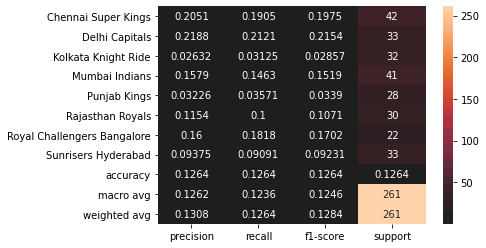

In [29]:
sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.4g', center=True);

***RANDOM SAMPLING :***

In [30]:
splitratio = 0.33
ntimes = 10
acc = []
for  i in range(ntimes):
    X_train,X_test,Y_train,Y_test = train_test_split(XScaled,Y,test_size=splitratio)
    clf = DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    acc.append(accuracy_score(Y_test,Y_pred))

print(sum(acc)/ntimes)    

0.1578544061302682


**K-FOLD**

In [31]:
k =10
scores = cross_val_score(DecisionTreeClassifier(),XScaled,Y,cv=k)
print(scores,'\n')
print(scores.mean())

[0.12658228 0.20253165 0.15189873 0.08860759 0.20253165 0.17721519
 0.13924051 0.13924051 0.10126582 0.12820513] 

0.1457319052255761
